In [58]:
import pandas as pd 

import numpy as np

# Data visualistaion libraries
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

# Machine learning libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [59]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [60]:
train.fillna(train.mean(),inplace=True)

/var/folders/lx/p_cqtsjn4y7c6hvp68g0fqdc0000gn/T/ipykernel_78629/1502088515.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(),inplace=True)


In [61]:
train.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [12]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

train["Gender"] = labelEncoder.fit_transform(train["Gender"])
train["Relationship_Status"] = labelEncoder.fit_transform(train["Relationship_Status"])
train["Unit"] = labelEncoder.fit_transform(train["Unit"])
train["Decision_skill_possess"] = labelEncoder.fit_transform(train["Decision_skill_possess"])
train["Compensation_and_Benefits"] = labelEncoder.fit_transform(train["Compensation_and_Benefits"])
train["Hometown"] = labelEncoder.fit_transform(train['Hometown'])

In [13]:
y = train["Attrition_rate"]
y = y.astype(float)
X = train.drop(["Attrition_rate", "Employee_ID"], axis=1)
X.columns.size

22

In [14]:
y.head()

0    0.1841
1    0.0670
2    0.0851
3    0.0668
4    0.1827
Name: Attrition_rate, dtype: float64

In [15]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000963
Best score using built-in LassoCV: 0.004737


In [16]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 4 variables


In [19]:
corr = train.corr()
corr.style.background_gradient(cmap='Dark2')

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Gender,1.000000,0.001824,-0.007127,0.008817,-0.030297,-0.009876,-0.000748,-0.000558,-0.020346,-0.011666,0.006566,0.003734,-0.004955,0.004732,-0.003700,-0.005024,0.002349,-0.000272,-0.003102,0.015351,0.009894,0.002916,0.028544
Age,0.001824,1.000000,-0.005599,-0.002087,-0.015199,-0.000059,0.022102,0.883423,0.141393,0.001230,0.011897,0.002367,0.012578,-0.012859,0.002985,0.005534,0.005023,0.007356,0.001664,0.000014,-0.000809,0.008476,-0.015086
Education_Level,-0.007127,-0.005599,1.000000,-0.000529,-0.003221,-0.001808,-0.015201,-0.012657,-0.002077,0.002991,-0.017690,0.009986,0.006830,0.008854,-0.015241,-0.002185,-0.009894,-0.009689,0.004283,0.005444,0.009195,0.012909,-0.008143
Relationship_Status,0.008817,-0.002087,-0.000529,1.000000,0.000558,0.004963,0.006011,0.001348,-0.005071,0.008672,0.004016,0.015647,0.008335,0.021127,-0.005129,0.008051,-0.016824,0.011275,0.022091,-0.012621,-0.001844,0.020221,0.009107
Hometown,-0.030297,-0.015199,-0.003221,0.000558,1.000000,0.002469,-0.004965,-0.016010,0.011038,0.013009,-0.011630,0.012366,-0.007325,0.016723,-0.018495,-0.001835,-0.002328,0.018874,-0.005620,0.006434,-0.003769,0.000680,0.006784
Unit,-0.009876,-0.000059,-0.001808,0.004963,0.002469,1.000000,0.009010,0.001126,-0.003842,0.002381,0.005390,0.013499,-0.002004,0.010266,-0.007996,-0.023901,-0.014344,-0.016866,0.011146,-0.008282,-0.011236,0.006817,0.024324
Decision_skill_possess,-0.000748,0.022102,-0.015201,0.006011,-0.004965,0.009010,1.000000,0.021516,0.007712,0.007926,-0.004180,-0.006427,0.007013,-0.001239,0.004050,0.010122,-0.001394,-0.001375,-0.009334,0.023749,-0.019980,0.001890,0.018104
Time_of_service,-0.000558,0.883423,-0.012657,0.001348,-0.016010,0.001126,0.021516,1.000000,0.135671,-0.003452,0.004791,-0.002261,0.020085,-0.012430,-0.002527,0.004715,0.003659,0.006804,-0.005679,0.003158,0.007542,0.006972,-0.016213
Time_since_promotion,-0.020346,0.141393,-0.002077,-0.005071,0.011038,-0.003842,0.007712,0.135671,1.000000,0.014147,-0.012061,-0.008851,-0.008896,0.009443,-0.007418,-0.002873,0.004022,-0.002783,-0.003549,0.000563,0.017264,0.005173,0.013880
growth_rate,-0.011666,0.001230,0.002991,0.008672,0.013009,0.002381,0.007926,-0.003452,0.014147,1.000000,0.008460,-0.006887,-0.004143,-0.007009,-0.018306,0.001351,0.010437,0.010991,0.020272,-0.015122,-0.005860,-0.017993,0.014247


Text(0.5, 1.0, 'Important Categories using Lasso Model')

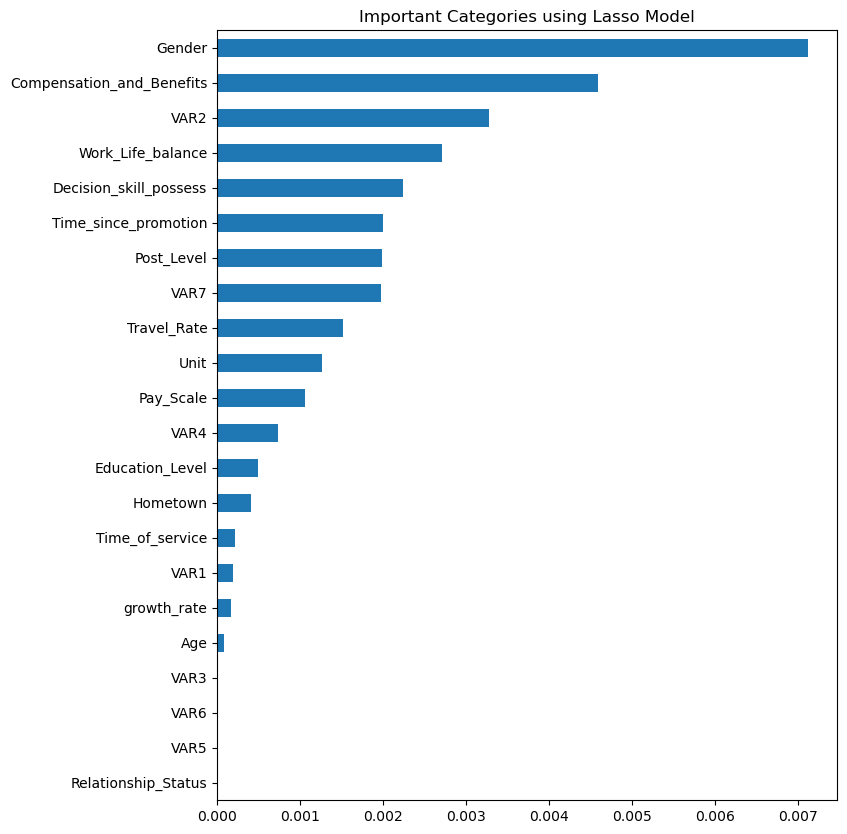

In [20]:
coef = coef.abs()
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Important Categories using Lasso Model")

In [21]:
# Correlation Matrix
X.drop(["Education_Level","Relationship_Status","Hometown","VAR1","VAR3","VAR5","VAR6"], 1, inplace=True)
X.drop(["Age","Time_since_promotion","Travel_Rate","VAR4"], 1, inplace=True)
# X.drop(["growth_rate"], 1, inplace=True)
# X.drop(["Education_Level"], 1, inplace=True)

X.columns.size

/var/folders/lx/p_cqtsjn4y7c6hvp68g0fqdc0000gn/T/ipykernel_78629/1682064840.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X.drop(["Education_Level","Relationship_Status","Hometown","VAR1","VAR3","VAR5","VAR6"], 1, inplace=True)
/var/folders/lx/p_cqtsjn4y7c6hvp68g0fqdc0000gn/T/ipykernel_78629/1682064840.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X.drop(["Age","Time_since_promotion","Travel_Rate","VAR4"], 1, inplace=True)


11

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [23]:
# from sklearn.preprocessing import StandardScaler
# SScaler = StandardScaler()
# x_train = SScaler.fit_transform(x_train)
# x_test = SScaler.transform(x_test)

In [24]:
# Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
random_forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

# Use the forest's predict method on the test data
rf_predictions = random_forest.predict(x_test)

# Print out the root mean square error (RMSE)
rf_rmse = sqrt(mse(y_test, rf_predictions))

print('Root Mean Square Error:', rf_rmse)
print("Final Score for comp = ",100*(1-rf_rmse))

Root Mean Square Error: 0.1918707025830847
Final Score for comp =  80.81292974169153


In [26]:
# Linear Regression Model

from sklearn import linear_model

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [32]:
lr_predictions = linear_regression.predict(x_test)

# Print out the root mean square error (RMSE)
lr_rmse = sqrt(mse(y_test, lr_predictions))

print('Root Mean Square Error:', lr_rmse)
print('Final Score for Comp',100*(1-lr_rmse))

Root Mean Square Error: 0.18625414682124516
Final Score for Comp 81.37458531787549


In [33]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
decision_tree = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
dt_predictions = decision_tree.predict(x_test)

# Print out the root mean square error (RMSE)
dt_rmse = sqrt(mse(y_test, dt_predictions))

print('Root Mean Square Error:', dt_rmse)
print('Final Score for Comp',100*(1-dt_rmse))

Root Mean Square Error: 0.2860179029861093
Final Score for Comp 71.39820970138906


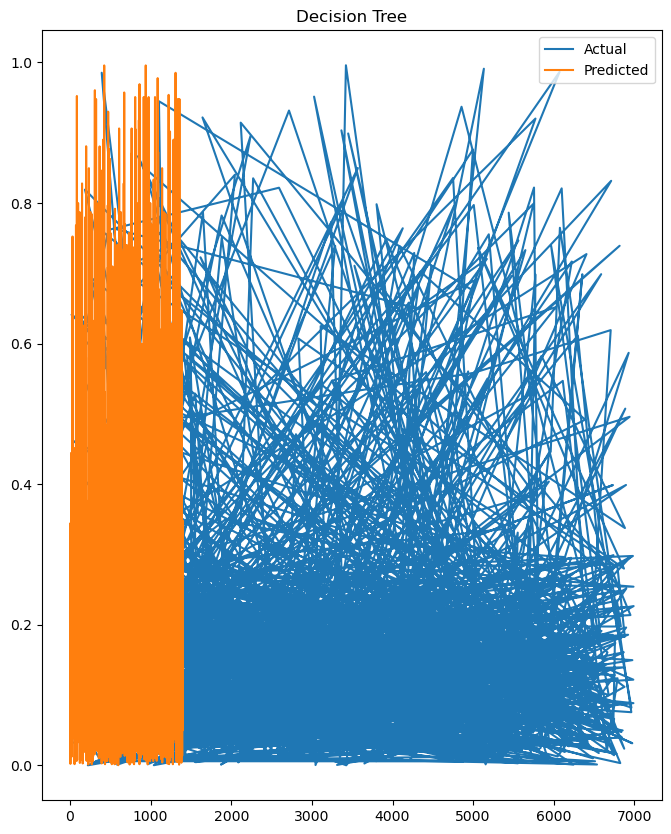

In [35]:
plt.plot(y_test, label='Actual')
plt.plot(dt_predictions, label='Predicted')
plt.title("Decision Tree")
plt.legend(frameon=True)
plt.show()

In [38]:
corr = train.corr()
corr.style.background_gradient(cmap='Pastel2')

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Gender,1.000000,0.001824,-0.007127,0.008817,-0.030297,-0.009876,-0.000748,-0.000558,-0.020346,-0.011666,0.006566,0.003734,-0.004955,0.004732,-0.003700,-0.005024,0.002349,-0.000272,-0.003102,0.015351,0.009894,0.002916,0.028544
Age,0.001824,1.000000,-0.005599,-0.002087,-0.015199,-0.000059,0.022102,0.883423,0.141393,0.001230,0.011897,0.002367,0.012578,-0.012859,0.002985,0.005534,0.005023,0.007356,0.001664,0.000014,-0.000809,0.008476,-0.015086
Education_Level,-0.007127,-0.005599,1.000000,-0.000529,-0.003221,-0.001808,-0.015201,-0.012657,-0.002077,0.002991,-0.017690,0.009986,0.006830,0.008854,-0.015241,-0.002185,-0.009894,-0.009689,0.004283,0.005444,0.009195,0.012909,-0.008143
Relationship_Status,0.008817,-0.002087,-0.000529,1.000000,0.000558,0.004963,0.006011,0.001348,-0.005071,0.008672,0.004016,0.015647,0.008335,0.021127,-0.005129,0.008051,-0.016824,0.011275,0.022091,-0.012621,-0.001844,0.020221,0.009107
Hometown,-0.030297,-0.015199,-0.003221,0.000558,1.000000,0.002469,-0.004965,-0.016010,0.011038,0.013009,-0.011630,0.012366,-0.007325,0.016723,-0.018495,-0.001835,-0.002328,0.018874,-0.005620,0.006434,-0.003769,0.000680,0.006784
Unit,-0.009876,-0.000059,-0.001808,0.004963,0.002469,1.000000,0.009010,0.001126,-0.003842,0.002381,0.005390,0.013499,-0.002004,0.010266,-0.007996,-0.023901,-0.014344,-0.016866,0.011146,-0.008282,-0.011236,0.006817,0.024324
Decision_skill_possess,-0.000748,0.022102,-0.015201,0.006011,-0.004965,0.009010,1.000000,0.021516,0.007712,0.007926,-0.004180,-0.006427,0.007013,-0.001239,0.004050,0.010122,-0.001394,-0.001375,-0.009334,0.023749,-0.019980,0.001890,0.018104
Time_of_service,-0.000558,0.883423,-0.012657,0.001348,-0.016010,0.001126,0.021516,1.000000,0.135671,-0.003452,0.004791,-0.002261,0.020085,-0.012430,-0.002527,0.004715,0.003659,0.006804,-0.005679,0.003158,0.007542,0.006972,-0.016213
Time_since_promotion,-0.020346,0.141393,-0.002077,-0.005071,0.011038,-0.003842,0.007712,0.135671,1.000000,0.014147,-0.012061,-0.008851,-0.008896,0.009443,-0.007418,-0.002873,0.004022,-0.002783,-0.003549,0.000563,0.017264,0.005173,0.013880
growth_rate,-0.011666,0.001230,0.002991,0.008672,0.013009,0.002381,0.007926,-0.003452,0.014147,1.000000,0.008460,-0.006887,-0.004143,-0.007009,-0.018306,0.001351,0.010437,0.010991,0.020272,-0.015122,-0.005860,-0.017993,0.014247


In [39]:
list_rmse = {}

In [40]:
# For feature selection
# Removing the feature that has the least rmse value.

from sklearn.linear_model import ElasticNetCV
from sklearn import datasets, ensemble

params = {'n_estimators': 100,
          'max_depth': 4,
          'learning_rate': 0.01,
          'loss': 'ls'}

y_ = train["Attrition_rate"]
y_ = y_.astype(float)
X2 = train.drop(["Attrition_rate", "Employee_ID"], axis=1)
X2 = X2.drop(["VAR3","VAR5","VAR6"], axis = 1)

m_f = float("inf")

features = X2.columns
for f in list(features):
  X_ = X2.drop([f], axis=1)
  fx_train,fx_test, fy_train, fy_test = train_test_split(X_,y_, test_size = 0.2, random_state=42)

  gradient_boosting = ensemble.GradientBoostingRegressor(**params)
  gradient_boosting.fit(fx_train, fy_train)

  gb_predictions = gradient_boosting.predict(fx_test)
  gb_rmse = sqrt(mse(fy_test, gb_predictions))

  if gb_rmse < m_f or gb_rmse == m_f:
    min_fea = f
    m_f = gb_rmse
    print(f, m_f)
list_rmse[min_fea] = m_f

/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Gender 0.18674571695121797


/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Education_Level 0.18665778220863


/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Relationship_Status 0.18663554564381457


/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Hometown 0.18652465652111908


/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/melizarodriguez/opt/anaconda3/lib

In [41]:
list_rmse

{'Hometown': 0.18652465652111908}

In [42]:
from sklearn import datasets, ensemble
params = {'n_estimators': 100,
          'max_depth': 4,
          'learning_rate': 0.01,
          'loss': 'ls'}

gradient_boosting = ensemble.GradientBoostingRegressor(**params)
gradient_boosting.fit(x_train, y_train)

gb_predictions = gradient_boosting.predict(x_test)
gb_rmse = sqrt(mse(y_test, gb_predictions))

print("Gradient Boosting Regression:", 100 * max(0,1 - gb_rmse))

/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Gradient Boosting Regression: 81.32494365953681


In [43]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
elasticnet = ElasticNetCV(alphas=alphas).fit(x_train,y_train)   
score = elasticnet.score(x_train, y_train)
en_predictions = elasticnet.predict(x_test)
en_rmse = sqrt(mse(y_test, en_predictions))

print("Elastic Net:", 100 * max(0,1 - en_rmse))

Elastic Net: 81.34189412077254


In [51]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=alphas,normalize=True)
ridge.fit(x_train, y_train)
rr_predictions = ridge.predict(x_test)
rr_rmse = sqrt(mse(y_test, rr_predictions))

print("Ridge Regression:", 100 * max(0,1 - rr_rmse))

Ridge Regression: 81.3680951031706


/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(
/Users/melizarodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1911: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha**-1)


In [48]:
from sklearn.linear_model import LassoCV

lasso = linear_model.Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
lasso_predictions = lasso.predict(x_test)
lasso_rmse = sqrt(mse(y_test, lasso_predictions))

print("Lasso Regression:", 100 * max(0,1 - lasso_rmse))

Lasso Regression: 81.34681046229149


In [53]:
print("Final Score for different Regression models:")
print("Random Forest:", 100 * max(0,1 - rf_rmse))
print("Linear Regression:", 100 * max(0,1 - lr_rmse))
print("Decision Tree:", 100 * max(0,1 - dt_rmse))
print("Gradient Boosting Regression:", 100 * max(0,1 - gb_rmse))
print("Ridge Regression:", 100 * max(0,1 - rr_rmse))
print("Lasso Regression:", 100 * max(0,1 - lasso_rmse))
print("Elastic Net:", 100 * max(0,1 - en_rmse))

Final Score for different Regression models:
Random Forest: 80.81292974169153
Linear Regression: 81.37458531787549
Decision Tree: 71.39820970138906
Gradient Boosting Regression: 81.32494365953681
Ridge Regression: 81.3680951031706
Lasso Regression: 81.34681046229149
Elastic Net: 81.34189412077254
